<a href="https://colab.research.google.com/github/Rashimanish/Flight_App/blob/main/EDA/EDA_Part_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Cleaned_Data/cleaned_data_01_08.csv'

#Read dataset
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.shape

(1802634, 22)

## **Understanding Delayed and Non delayed for the two years stacked in plot**

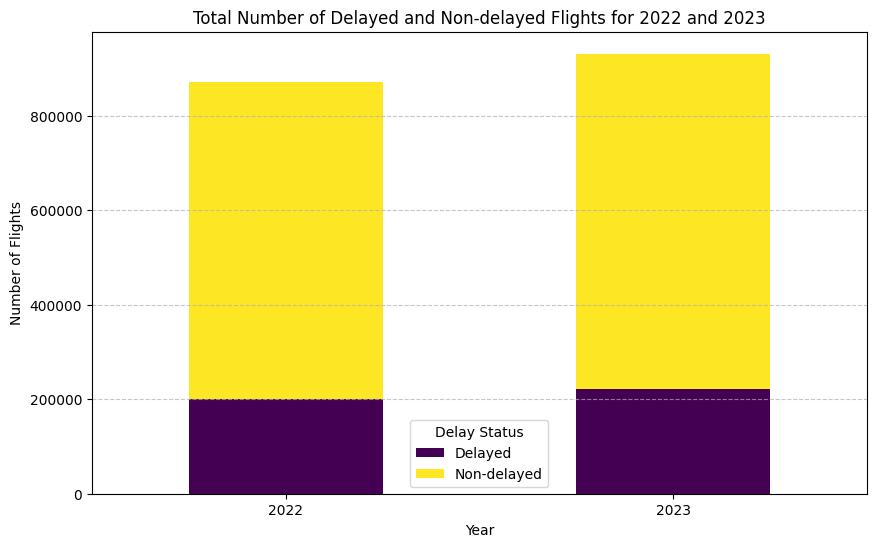

In [4]:
#'DEP_DEL15' is categorized into 'Delayed' and 'Non-delayed'
df['Delay Status'] = df['DEP_DEL15'].map({0: 'Non-delayed', 1: 'Delayed'})

#counts for each year and delay status
delay_summary = df.groupby(['YEAR', 'Delay Status']).size().reset_index(name='Count')

pivot_data = delay_summary.pivot(index='YEAR', columns='Delay Status', values='Count').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Total Number of Delayed and Non-delayed Flights for 2022 and 2023')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.legend(title='Delay Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*There was a significant increase in flight delays from 2022 to 2023, despite an overall growth in air travel.*

## **Depature delays over years**

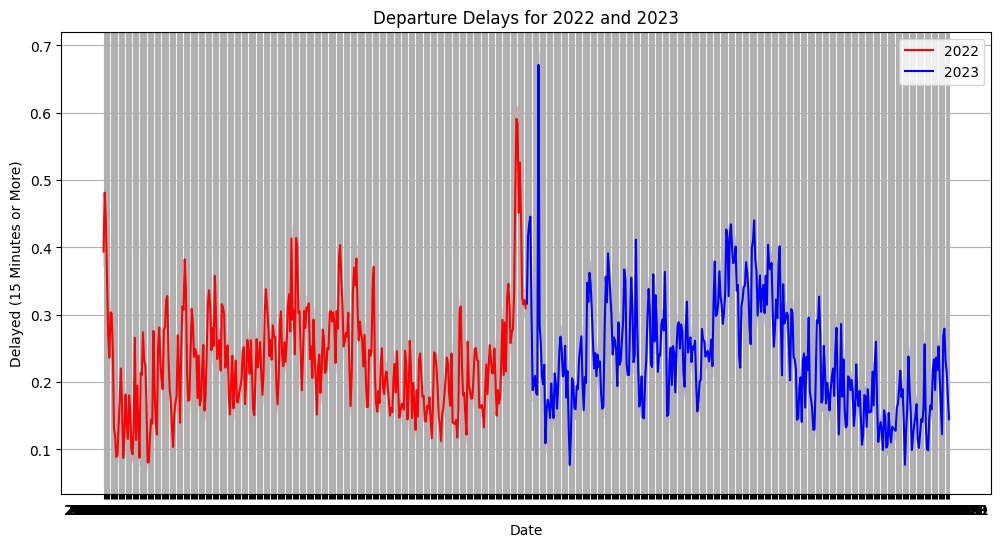

In [5]:
# Filter data for years 2022 and 2023
df_2022 = df[df['YEAR'] == 2022]
df_2023 = df[df['YEAR'] == 2023]

plt.figure(figsize=(12, 6))

# Plot data for 2022
sns.lineplot(data=df_2022, x='FL_DATE', y='DEP_DEL15', label='2022', color='r')

# Plot data for 2023
sns.lineplot(data=df_2023, x='FL_DATE', y='DEP_DEL15', label='2023', color='b')

plt.xlabel('Date')
plt.ylabel('Delayed (15 Minutes or More)')
plt.title('Departure Delays for 2022 and 2023')
plt.legend()
plt.grid(True)
plt.show()

*Departure delays were similar in both 2022 and 2023, with fluctuating SEASONAL patterns throughout the year.*

## **Number of Departure Delays by Airport and Year**

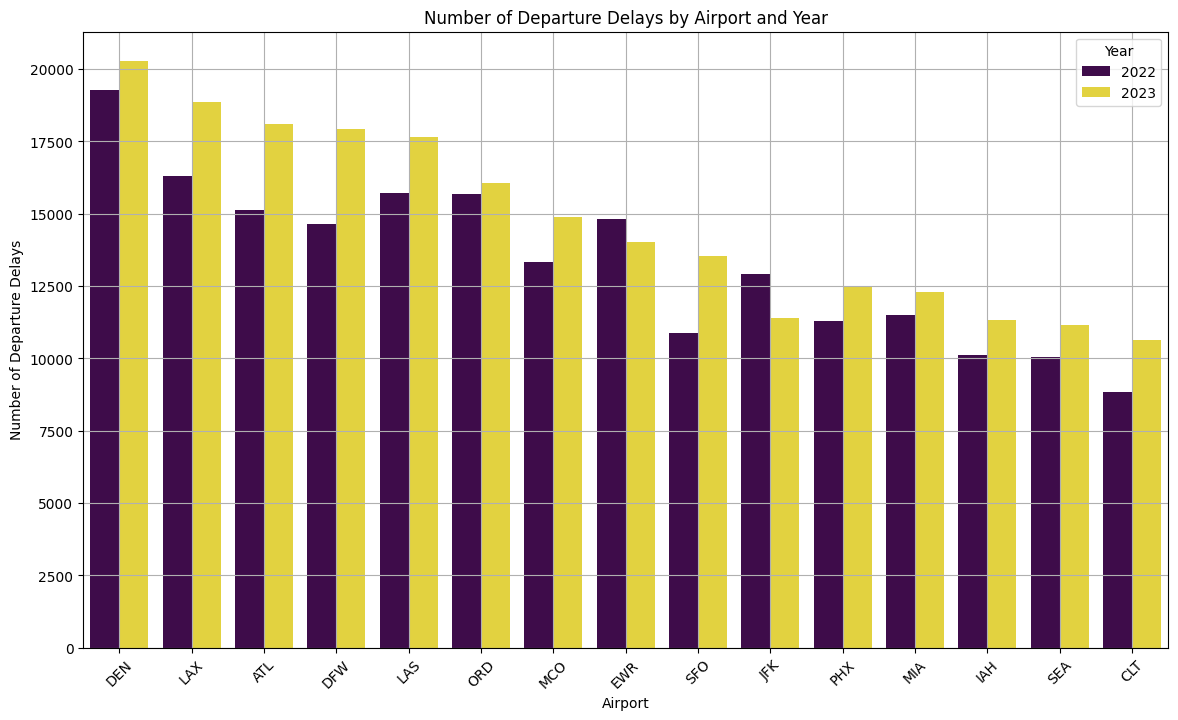

In [6]:
departure_delays = df[df['DEP_DEL15'] == 1]

# Count delays by airport and year
departure_delay_counts = departure_delays.groupby(['ORIGIN', 'YEAR']).size().reset_index(name='Departure Delay Count')

# Sort
departure_delay_counts = departure_delay_counts.sort_values(by='Departure Delay Count', ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='ORIGIN', y='Departure Delay Count', hue='YEAR', data=departure_delay_counts, palette='viridis')
plt.title('Number of Departure Delays by Airport and Year')
plt.xlabel('Airport')
plt.ylabel('Number of Departure Delays')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

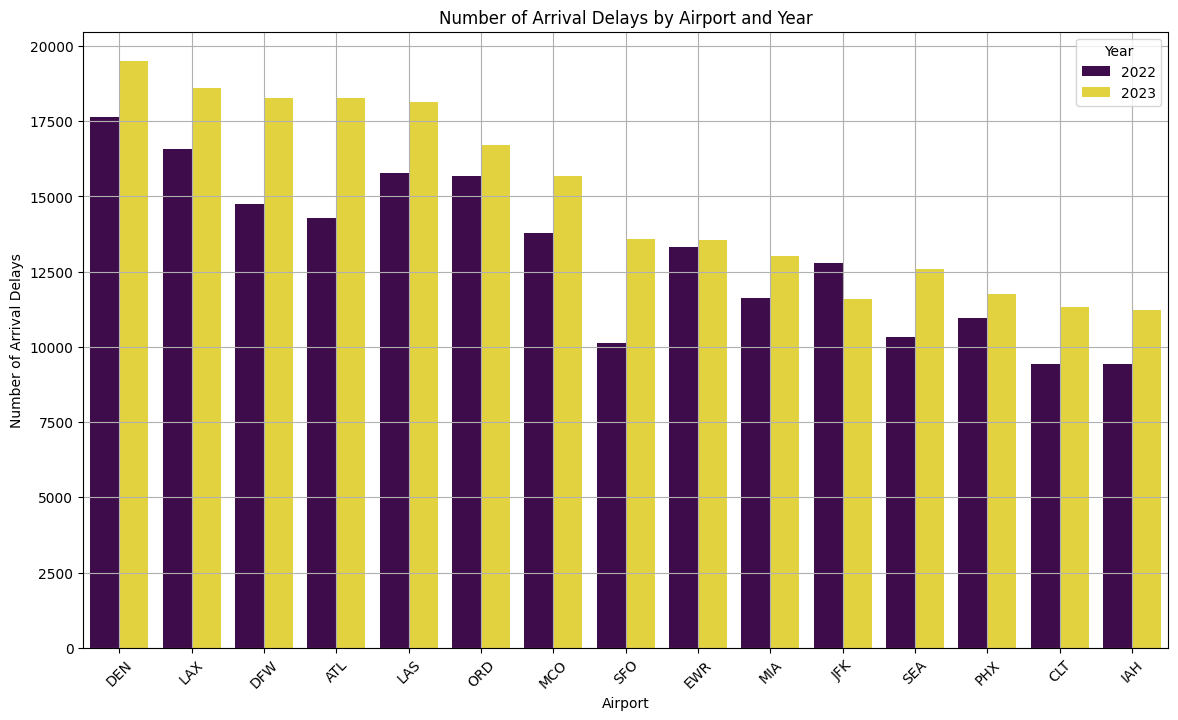

In [7]:
arrival_delays = df[df['ARR_DEL15'] == 1]

# Count delays by airport and year
arrival_delay_counts = arrival_delays.groupby(['ORIGIN', 'YEAR']).size().reset_index(name='Arrival Delay Count')

arrival_delay_counts = arrival_delay_counts.sort_values(by='Arrival Delay Count', ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='ORIGIN', y='Arrival Delay Count', hue='YEAR', data=arrival_delay_counts, palette='viridis')
plt.title('Number of Arrival Delays by Airport and Year')
plt.xlabel('Airport')
plt.ylabel('Number of Arrival Delays')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

## **Understanding the distribution of flight delay times,which can highlight any skewness in the delay times**





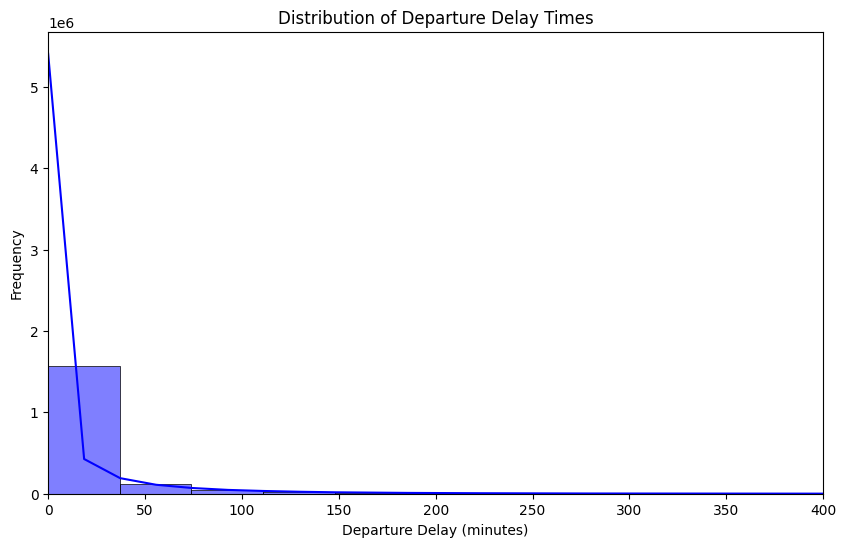

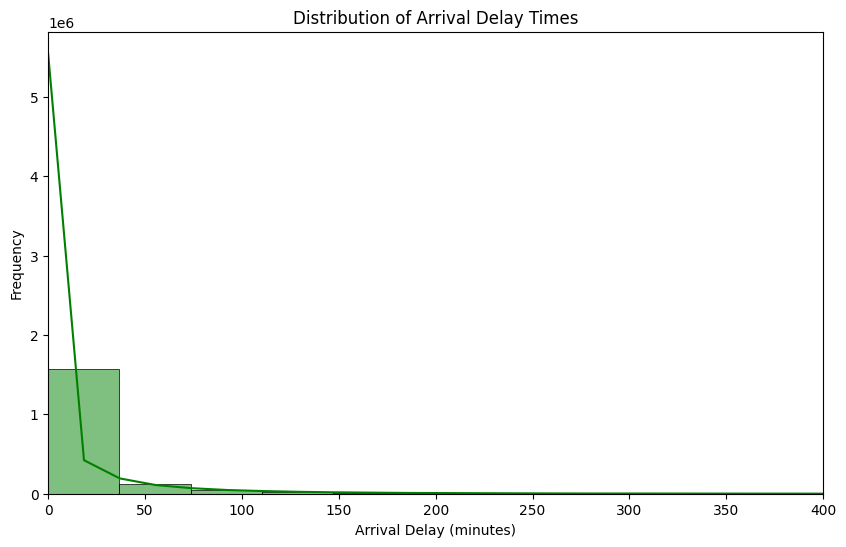

In [8]:
# Distribution of departure delay times
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY_NEW'].dropna(), kde=True, color='blue', bins=100)
plt.title('Distribution of Departure Delay Times')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.show()

# Distribution of arrival delay times
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY_NEW'].dropna(), kde=True, color='green', bins=100)
plt.title('Distribution of Arrival Delay Times')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.show()

In [9]:
departure_delay = df['DEP_DELAY_NEW']
departure_skewness = departure_delay.skew()
departure_kurtosis = departure_delay.kurt()

print("Departure Delay Skewness: %f" % departure_skewness)
print("Departure Delay Kurtosis: %f" % departure_kurtosis)

Departure Delay Skewness: 10.959660
Departure Delay Kurtosis: 216.566263


In [10]:
arrival_delay = df['ARR_DELAY_NEW']
arrival_skewness = arrival_delay.skew()
arrival_kurtosis = arrival_delay.kurt()

print("Arrival Delay Skewness: %f" % arrival_skewness)
print("Arrival Delay Kurtosis: %f" % arrival_kurtosis)

Arrival Delay Skewness: 10.997670
Arrival Delay Kurtosis: 218.683314


*From histogram and by skewness and kurtosis index, the departure & arrival delays are mostly located to the right side of the graph with a very long tail to the right. The majority of delays are short and the longer delays, while unusual are more heavily loaded in time.*








## **Departure Delay by time of the day**

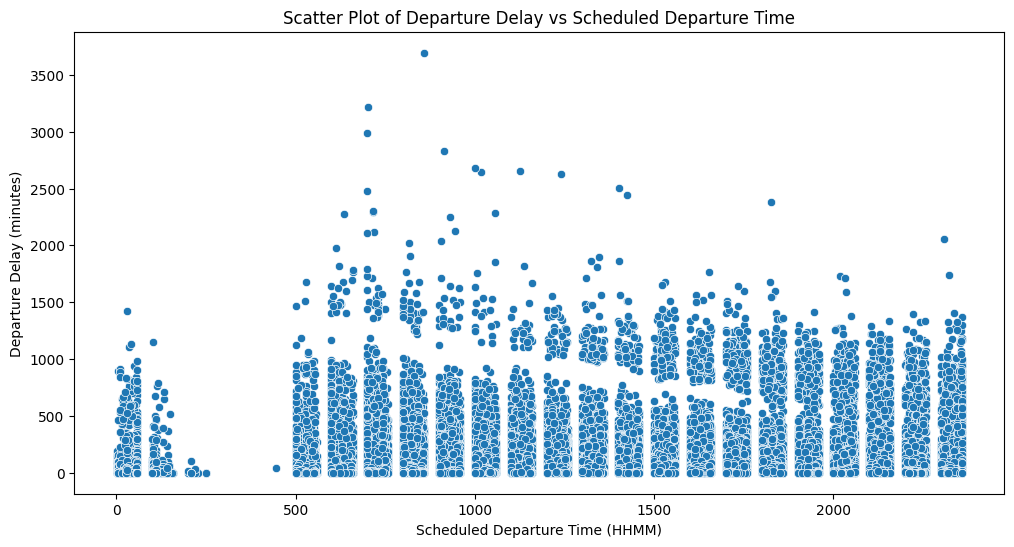

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CRS_DEP_TIME', y='DEP_DELAY_NEW')
plt.title('Scatter Plot of Departure Delay vs Scheduled Departure Time')
plt.xlabel('Scheduled Departure Time (HHMM)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

*The duration of departure delay with respect to the time of scheduled departure increases in the morning and then slowly decreases towards the end of the day.*

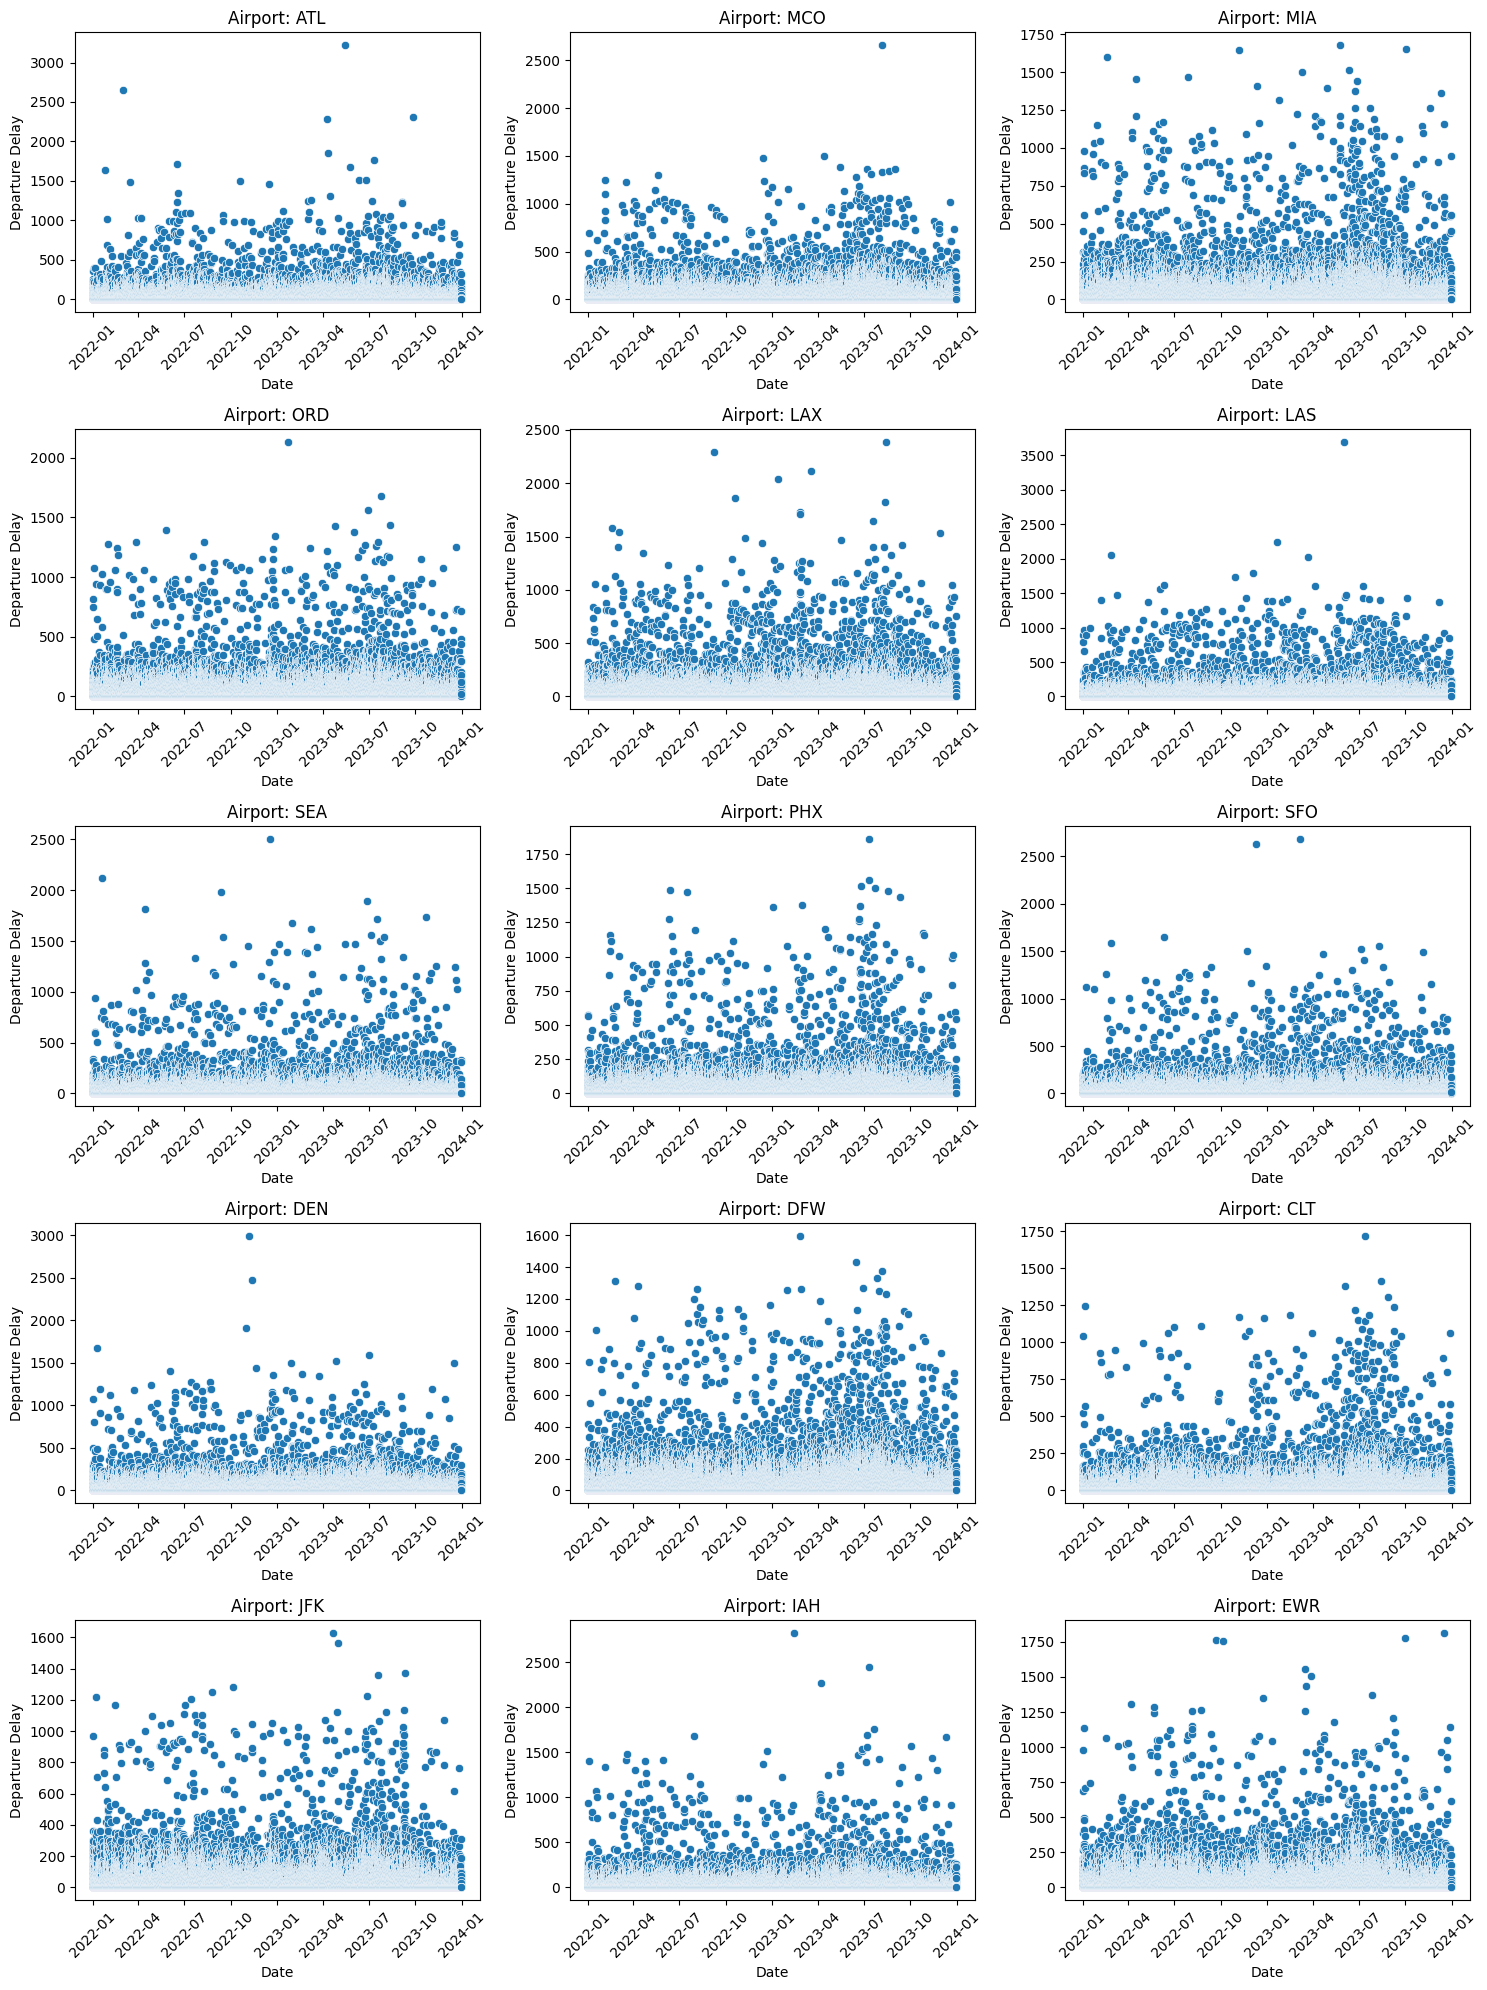

In [12]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
airports = df['ORIGIN'].unique()

#subplots
n_airports = len(airports)
n_cols = 3
n_rows = (n_airports + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

#scatter plots for each airport
for i, airport in enumerate(airports):
    airport_data = df[df['ORIGIN'] == airport]
    sns.scatterplot(data=airport_data, x='FL_DATE', y='DEP_DELAY_NEW', ax=axes[i])
    axes[i].set_title(f'Airport: {airport}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Departure Delay')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(len(airports), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

*Airports like ATL, ORD, LAX, and DFW appear to have a higher concentration of data points, suggesting potentially higher numbers of delays & Airports like SEA, PHX, and SFO seem to have a lower density of data points, indicating potentially fewer delays*

## **Understanding the Airlines**

<ipython-input-13-dbfee91abb58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ORIGIN', data=df, order=df['ORIGIN'].value_counts().index, palette='viridis')


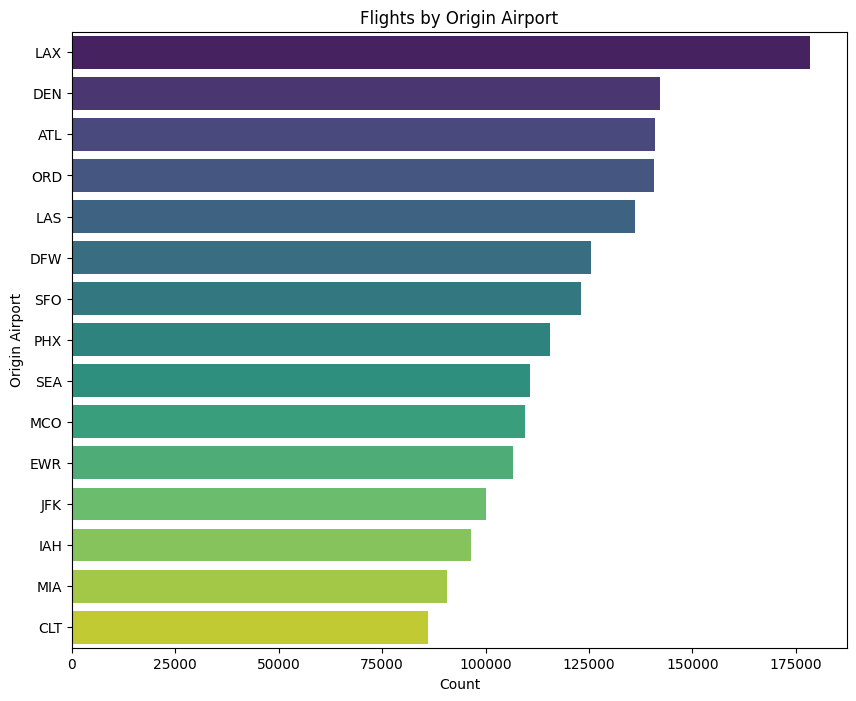

<ipython-input-13-dbfee91abb58>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DEST', data=df, order=df['DEST'].value_counts().index, palette='coolwarm')


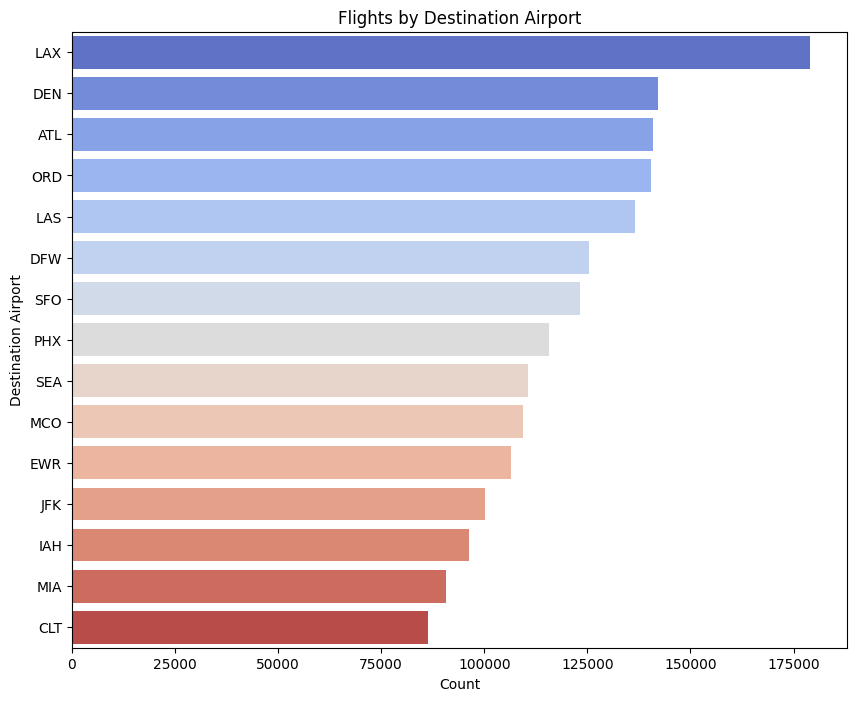

In [13]:
#origin airports
plt.figure(figsize=(10, 8))
sns.countplot(y='ORIGIN', data=df, order=df['ORIGIN'].value_counts().index, palette='viridis')
plt.title('Flights by Origin Airport')
plt.xlabel('Count')
plt.ylabel('Origin Airport')
plt.show()

#destination airports
plt.figure(figsize=(10, 8))
sns.countplot(y='DEST', data=df, order=df['DEST'].value_counts().index, palette='coolwarm')
plt.title('Flights by Destination Airport')
plt.xlabel('Count')
plt.ylabel('Destination Airport')
plt.show()


<ipython-input-14-0ec47c2a423b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ORIGIN', y='Delay Count', data=delay_counts, palette='viridis')


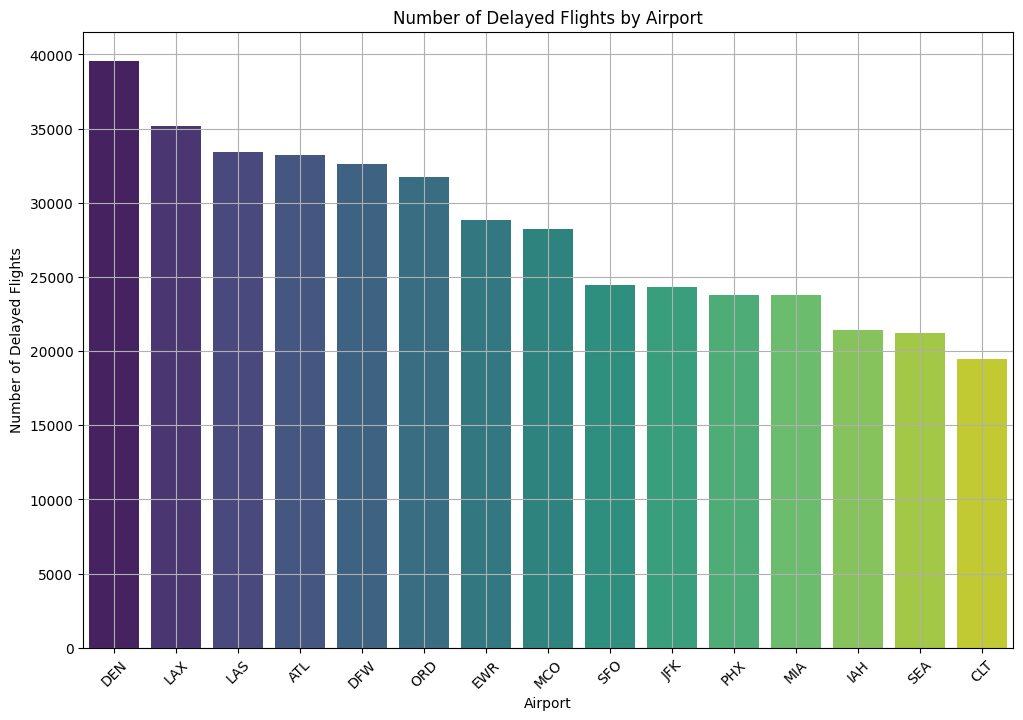

In [14]:
delayed_flights = df[df['DEP_DEL15'] == 1]
delay_counts = delayed_flights.groupby('ORIGIN').size().reset_index(name='Delay Count')

# Sort
delay_counts = delay_counts.sort_values(by='Delay Count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ORIGIN', y='Delay Count', data=delay_counts, palette='viridis')
plt.title('Number of Delayed Flights by Airport')
plt.xlabel('Airport')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

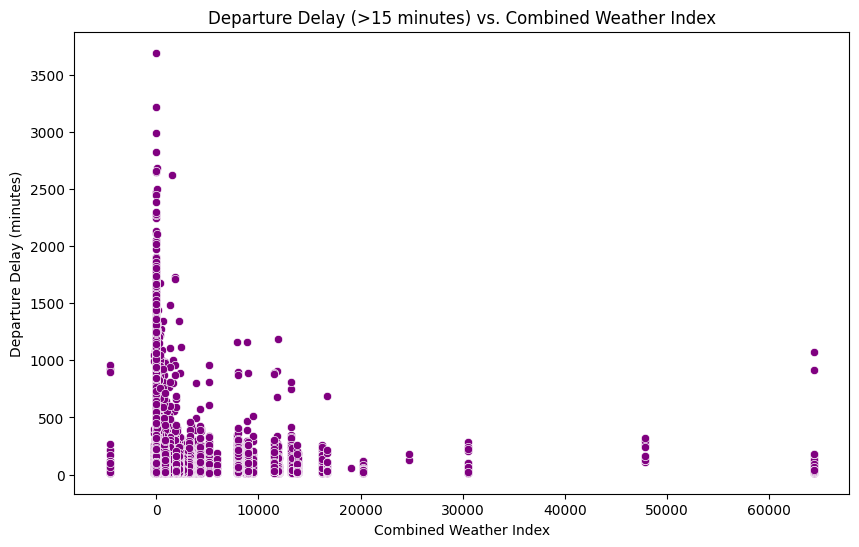

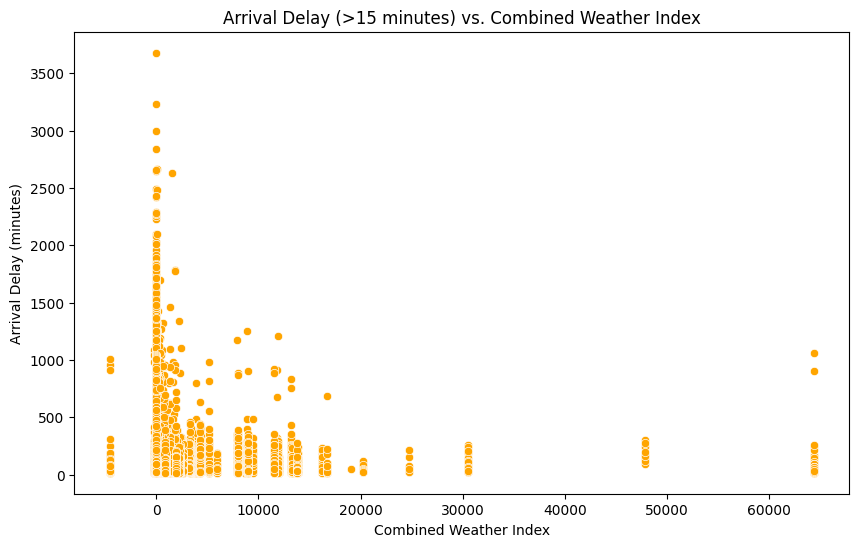

In [15]:
df['weather_var'] = df['Maximum temperature'] * df['Minimum temperature'] * df['Precipitation'] * df['Snowfall'] * df['Average wind speed']

#delays more than 15 minutes
df_dep_delay = df[df['DEP_DELAY_NEW'] > 15]
df_arr_delay = df[df['ARR_DELAY_NEW'] > 15]

# Scatter plot for combined weather index vs departure delay (more than 15 minutes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weather_var', y='DEP_DELAY_NEW', data=df_dep_delay, color='purple')
plt.xlabel('Combined Weather Index')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delay (>15 minutes) vs. Combined Weather Index')
plt.show()

# Scatter plot for combined weather index vs arrival delay (more than 15 minutes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weather_var', y='ARR_DELAY_NEW', data=df_arr_delay, color='orange')
plt.xlabel('Combined Weather Index')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay (>15 minutes) vs. Combined Weather Index')
plt.show()

*There seems to be a weak link between weather conditions and flight delays. While worse weather might lead to slightly longer delays, many other factors also influence flight times. Extreme delays often happen regardless of weather conditions.*

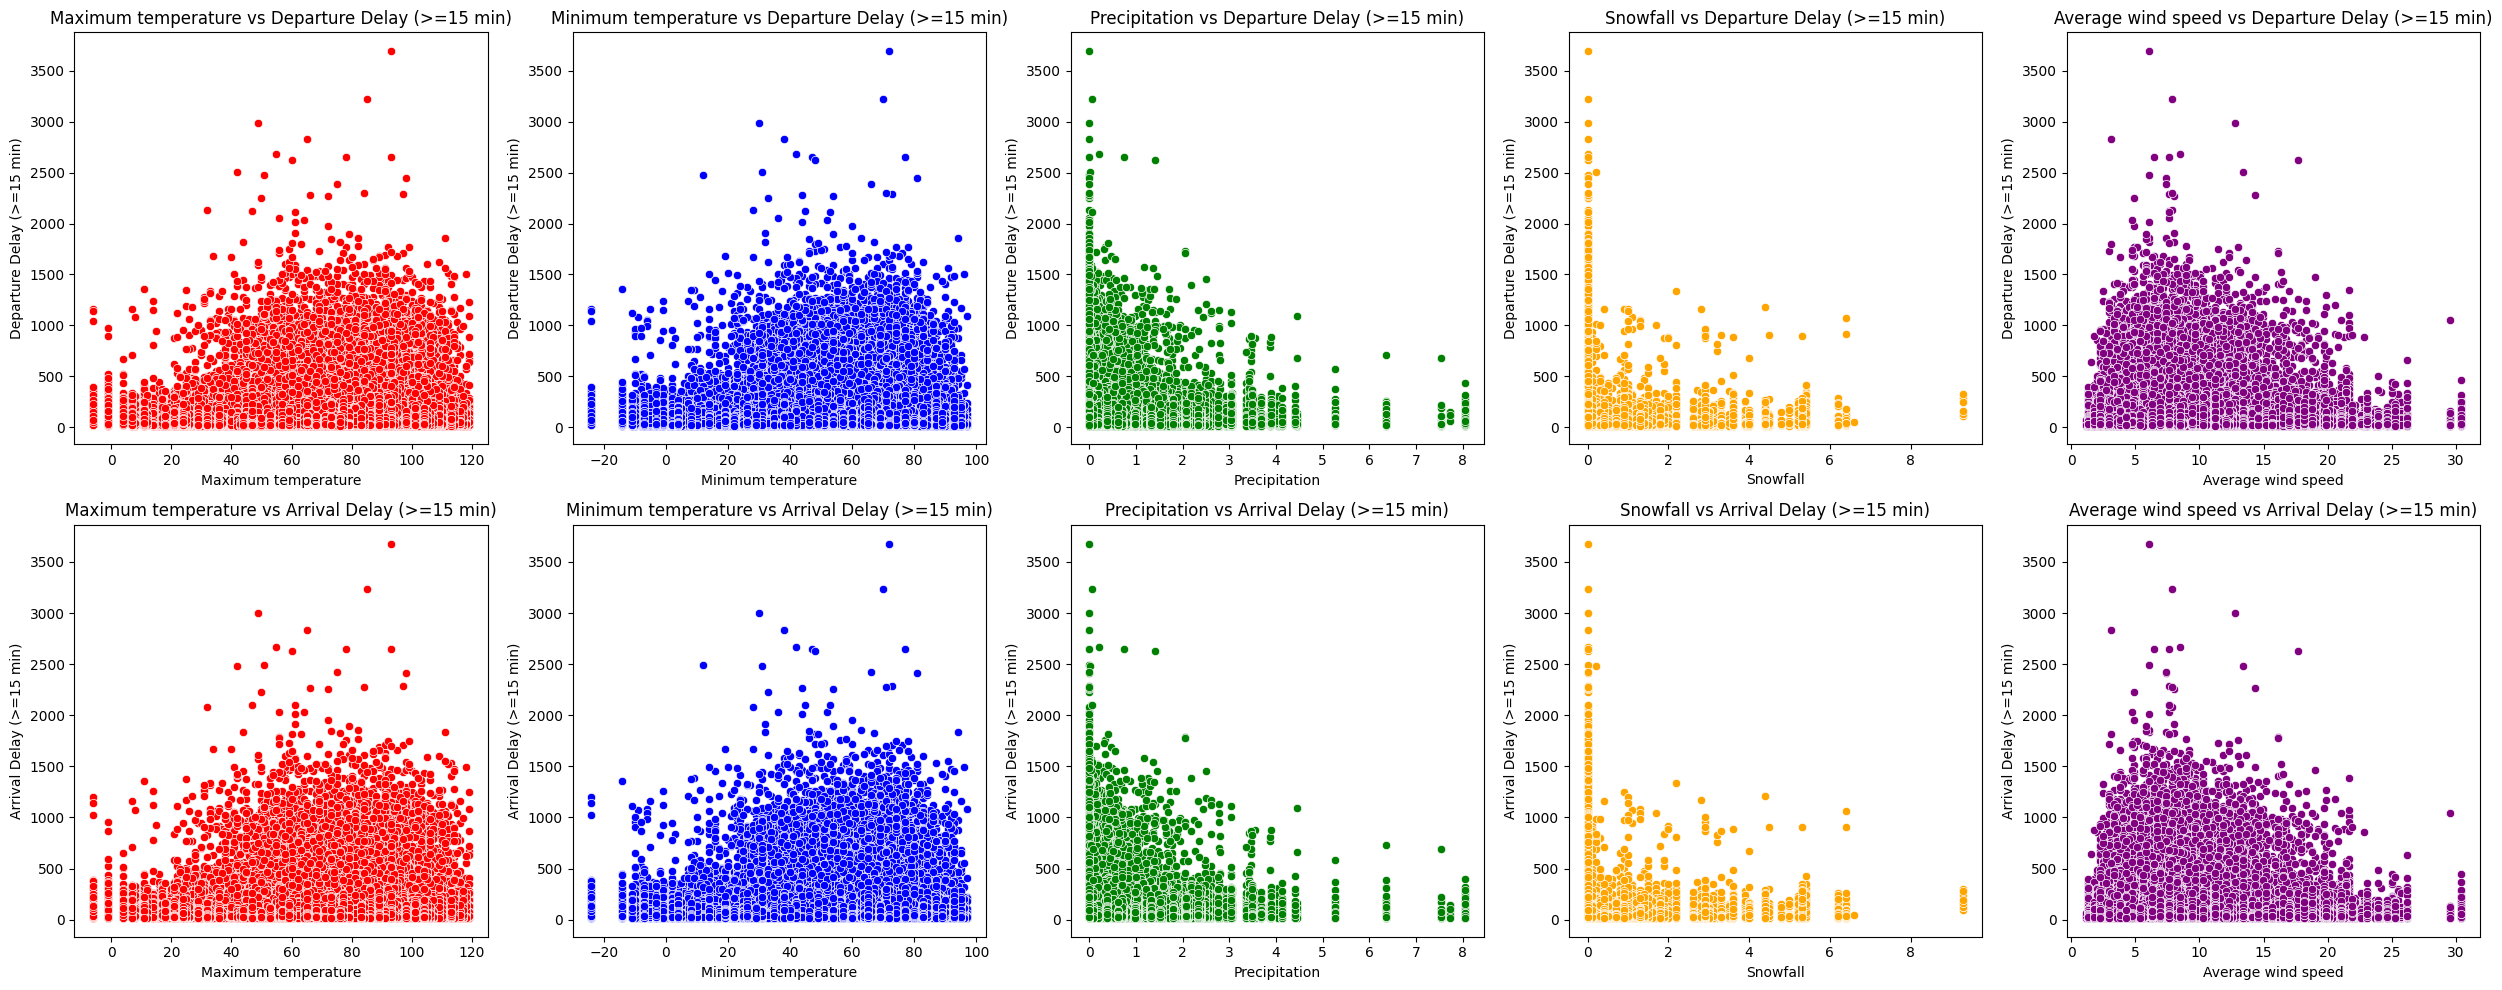

In [16]:
weather_vars = ['Maximum temperature', 'Minimum temperature', 'Precipitation', 'Snowfall', 'Average wind speed']
delays = ['DEP_DELAY_NEW', 'ARR_DELAY_NEW']
titles = ['Departure Delay (>=15 min)', 'Arrival Delay (>=15 min)']
colors = ['red', 'blue', 'green', 'orange', 'purple']
df_dep_delay = df[df['DEP_DELAY_NEW'] > 15]
df_arr_delay = df[df['ARR_DELAY_NEW'] > 15]

fig, axes = plt.subplots(2, len(weather_vars), figsize=(25, 10))

for i, delay in enumerate(delays):
    for j, weather_var in enumerate(weather_vars):
        ax = axes[i, j]
        if i == 0:
            sns.scatterplot(x=weather_var, y=delay, data=df_dep_delay, color=colors[j], ax=ax)
        else:
            sns.scatterplot(x=weather_var, y=delay, data=df_arr_delay, color=colors[j], ax=ax)
        ax.set_title(f'{weather_var} vs {titles[i]}')
        ax.set_xlabel(weather_var)
        ax.set_ylabel(titles[i])

plt.tight_layout()
plt.show()

*Weather has a minimal impact on flight delays. While factors like wind speed can sometimes contribute to longer delays, other elements like temperature and precipitation show little correlation with departure times*

**Identify outliers in the delay times using box plots**

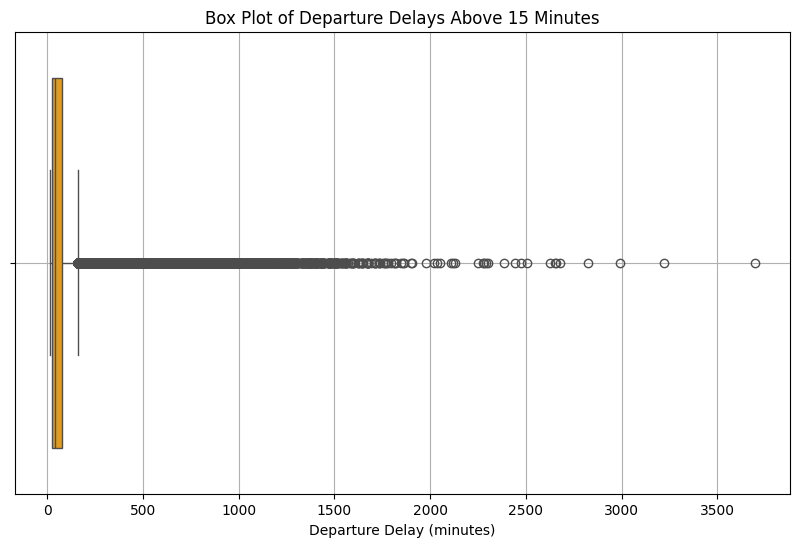

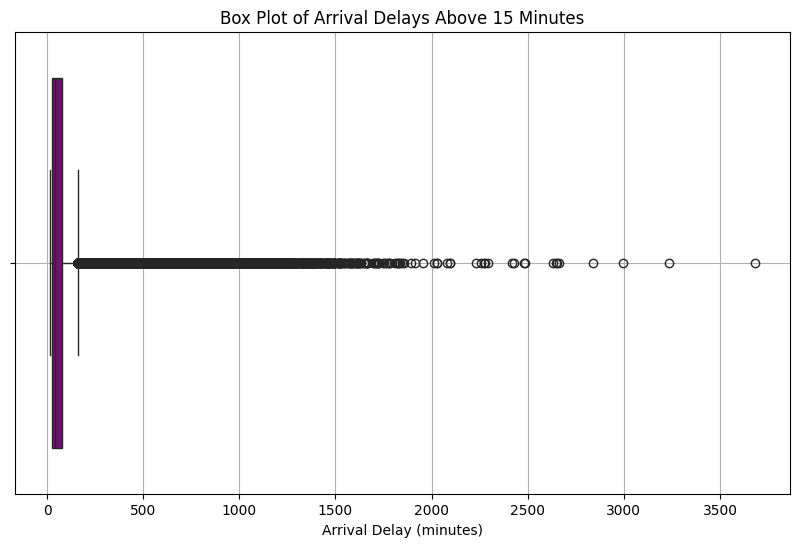

In [17]:
# Filter data for delays above 15 minutes
df_delayed_departures = df[df['DEP_DELAY_NEW'] > 15]
df_delayed_arrivals = df[df['ARR_DELAY_NEW'] > 15]

# Box plot for departure delay times above 15 minutes
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEP_DELAY_NEW', data=df_delayed_departures, color='orange')
plt.title('Box Plot of Departure Delays Above 15 Minutes')
plt.xlabel('Departure Delay (minutes)')
plt.grid(True)
plt.show()

# Box plot for arrival delay times above 15 minutes
plt.figure(figsize=(10, 6))
sns.boxplot(x='ARR_DELAY_NEW', data=df_delayed_arrivals, color='purple')
plt.title('Box Plot of Arrival Delays Above 15 Minutes')
plt.xlabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

In [18]:
df['DEP_DELAY_NEW'] = pd.to_numeric(df['DEP_DELAY_NEW'], errors='coerce')
df['ARR_DELAY_NEW'] = pd.to_numeric(df['ARR_DELAY_NEW'], errors='coerce')

# Convert delays to hours
df['DEP_DELAY_HOURS'] = df['DEP_DELAY_NEW'] / 60
df['ARR_DELAY_HOURS'] = df['ARR_DELAY_NEW'] / 60

# Filter data for delays above 15 minutes (0.25 hours)
df_delayed_departures = df[df['DEP_DELAY_HOURS'] > 0.25]
df_delayed_arrivals = df[df['ARR_DELAY_HOURS'] > 0.25]

# Calculate IQR for departure and arrival delays
Q1_dep = df_delayed_departures['DEP_DELAY_HOURS'].quantile(0.25)
Q3_dep = df_delayed_departures['DEP_DELAY_HOURS'].quantile(0.75)
IQR_dep = Q3_dep - Q1_dep

Q1_arr = df_delayed_arrivals['ARR_DELAY_HOURS'].quantile(0.25)
Q3_arr = df_delayed_arrivals['ARR_DELAY_HOURS'].quantile(0.75)
IQR_arr = Q3_arr - Q1_arr

# Identify outliers
outliers_dep = df_delayed_departures[(df_delayed_departures['DEP_DELAY_HOURS'] < (Q1_dep - 1.5 * IQR_dep)) | (df_delayed_departures['DEP_DELAY_HOURS'] > (Q3_dep + 1.5 * IQR_dep))]
outliers_arr = df_delayed_arrivals[(df_delayed_arrivals['ARR_DELAY_HOURS'] < (Q1_arr - 1.5 * IQR_arr)) | (df_delayed_arrivals['ARR_DELAY_HOURS'] > (Q3_arr + 1.5 * IQR_arr))]

# Combine outliers
outliers = pd.concat([outliers_dep, outliers_arr]).drop_duplicates()

# Calculate percentage of outliers
percentage_outliers = len(outliers) / len(df) * 100

print(f"Percentage of outliers using IQR method: {percentage_outliers:.2f}%")


Percentage of outliers using IQR method: 2.00%


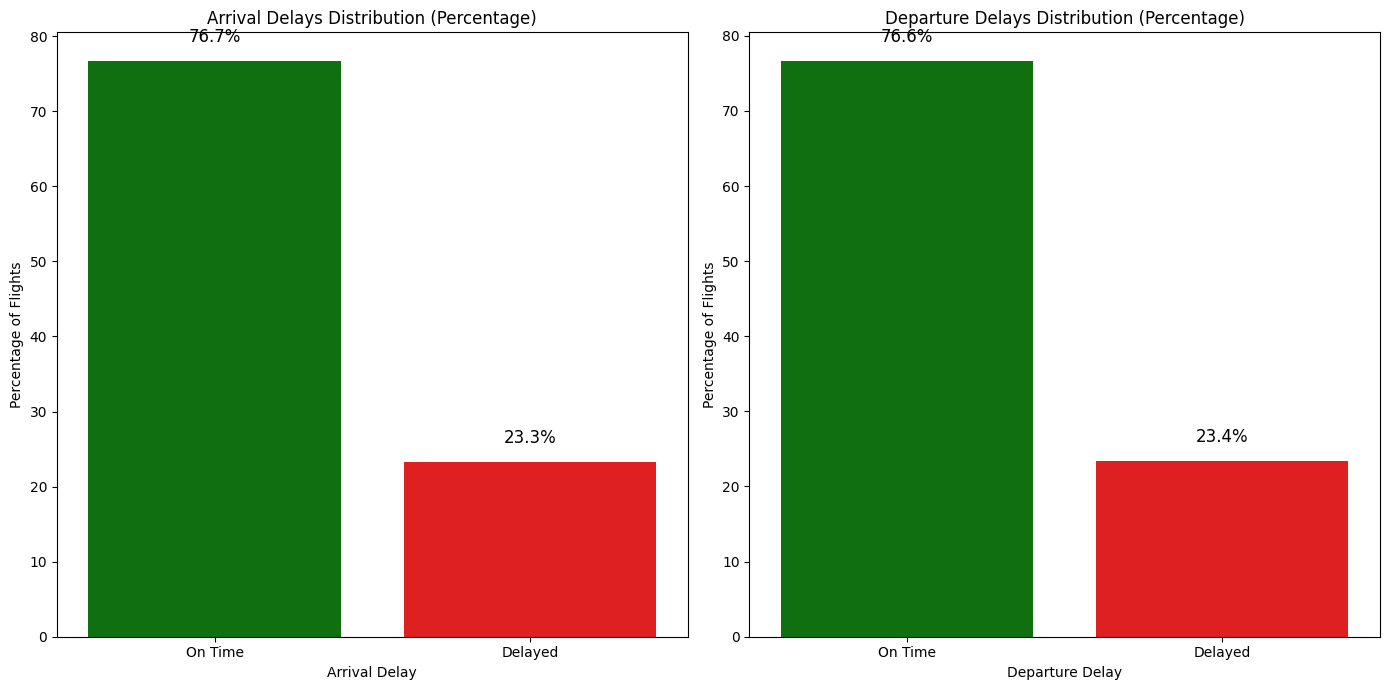

In [19]:
df['ARR_DEL15'] = pd.to_numeric(df['ARR_DEL15'], errors='coerce')
df['DEP_DEL15'] = pd.to_numeric(df['DEP_DEL15'], errors='coerce')

#total number of flights
total_flights = len(df)

#percentages for arrival delays
arrival_delay_counts = df['ARR_DEL15'].value_counts().sort_values(ascending=False)
arrival_delay_percentages = (arrival_delay_counts / total_flights) * 100

#percentages for departure delays
departure_delay_counts = df['DEP_DEL15'].value_counts().sort_values(ascending=False)
departure_delay_percentages = (departure_delay_counts / total_flights) * 100

plt.figure(figsize=(14, 7))

# Bar chart for Arrival Delays
plt.subplot(1, 2, 1)
sns.barplot(x=arrival_delay_counts.index, y=arrival_delay_percentages, hue=arrival_delay_counts.index, palette=['green', 'red'], legend=False)
plt.title('Arrival Delays Distribution (Percentage)')
plt.xlabel('Arrival Delay')
plt.ylabel('Percentage of Flights')
plt.xticks(ticks=[0, 1], labels=['On Time', 'Delayed'])


for bar, pct in zip(plt.gca().patches, arrival_delay_percentages.round(1)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{pct:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Bar chart for Departure Delays
plt.subplot(1, 2, 2)
sns.barplot(x=departure_delay_counts.index, y=departure_delay_percentages, hue=departure_delay_counts.index, palette=['green', 'red'], legend=False)
plt.title('Departure Delays Distribution (Percentage)')
plt.xlabel('Departure Delay')
plt.ylabel('Percentage of Flights')
plt.xticks(ticks=[0, 1], labels=['On Time', 'Delayed'])

for bar, pct in zip(plt.gca().patches, departure_delay_percentages.round(1)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{pct:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

**Identify potential relationships between numerical variables**

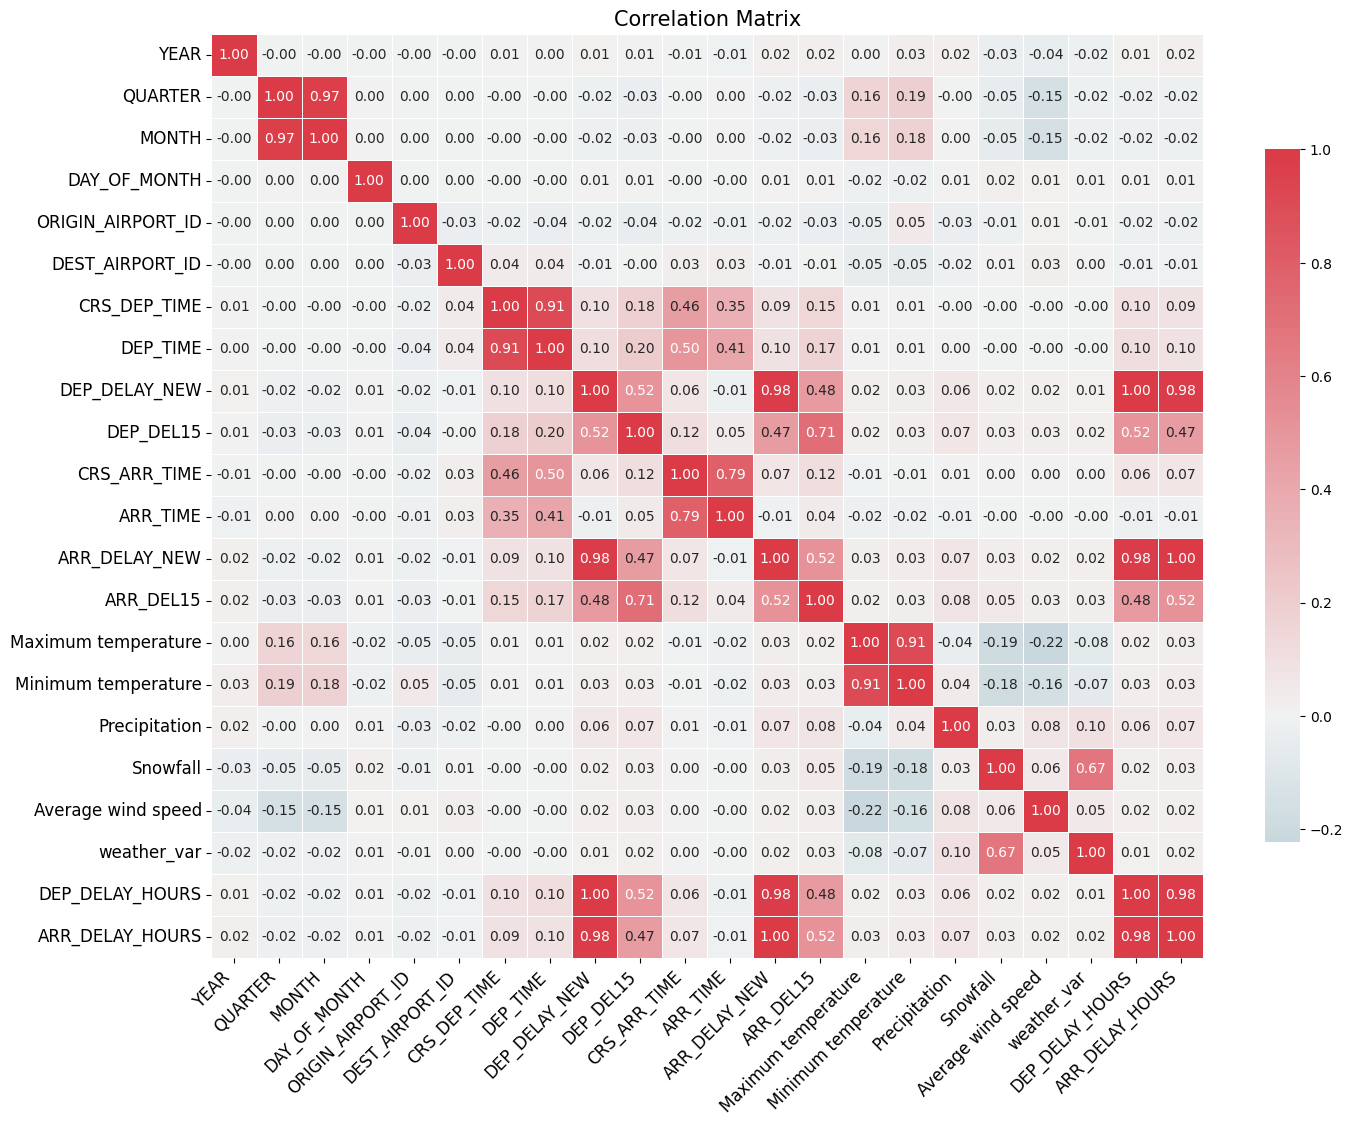

In [20]:
# numeric columns
numeric_df = df.select_dtypes(include=['number'])

# correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = numeric_df.corr()

# colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, center=0,
            cbar_kws={"shrink": 0.75}, annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Correlation Matrix', fontsize=15)
plt.show()